In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

  Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
1   176559  Bose SoundSport Headphones                 1       99.99   
2   176560                Google Phone                 1      600.00   
3   176560            Wired Headphones                 1       11.99   
4   176561            Wired Headphones                 1       11.99   
5   176562        USB-C Charging Cable                 1       11.95   
6   176563  Bose SoundSport Headphones                 1       99.99   
7   176564        USB-C Charging Cable                 1       11.95   
8   176565          Macbook Pro Laptop                 1     1700.00   
9   176566            Wired Headphones                 1       11.99   

       Order Date                        Purchase Address  Month  \
0  04/19/19 08:46            917 1st St, Dallas, TX 75001      4   
1  04/07/19 22:30       682 Chestnut St, Boston, MA 02215      4   
2  

C:\Users\nikhi\AppData\Local\Temp\ipykernel_1948\3006595984.py:71: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  all_data.groupby(['Month']).sum()['Sales']
C:\Users\nikhi\AppData\Local\Temp\ipykernel_1948\3006595984.py:77: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.bar(months, all_data.groupby(['Month']).sum()['Sales'])
C:\Users\nikhi\AppData\Local\Temp\ipykernel_1948\3006595984.py:89: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid fo

range(0, 24)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 178437 entries, 0 to 186304
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Order ID  178437 non-null  object
 1   Grouped   178437 non-null  object
dtypes: object(2)
memory usage: 4.1+ MB
('USB-C Charging Cable', 'USB-C Charging Cable') 22095
('Lightning Charging Cable', 'Lightning Charging Cable') 21874
('AAA Batteries (4-pack)', 'AAA Batteries (4-pack)') 20833
('AA Batteries (4-pack)', 'AA Batteries (4-pack)') 20717
('Wired Headphones', 'Wired Headphones') 19022
('Apple Airpods Headphones', 'Apple Airpods Headphones') 15645
('Bose SoundSport Headphones', 'Bose SoundSport Headphones') 13433
('27in FHD Monitor', '27in FHD Monitor') 7543
('iPhone', 'iPhone') 6850
('27in 4K Gaming Monitor', '27in 4K Gaming Monitor') 6250


C:\Users\nikhi\AppData\Local\Temp\ipykernel_1948\3006595984.py:149: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_ordered = product_group.sum()['Quantity Ordered']


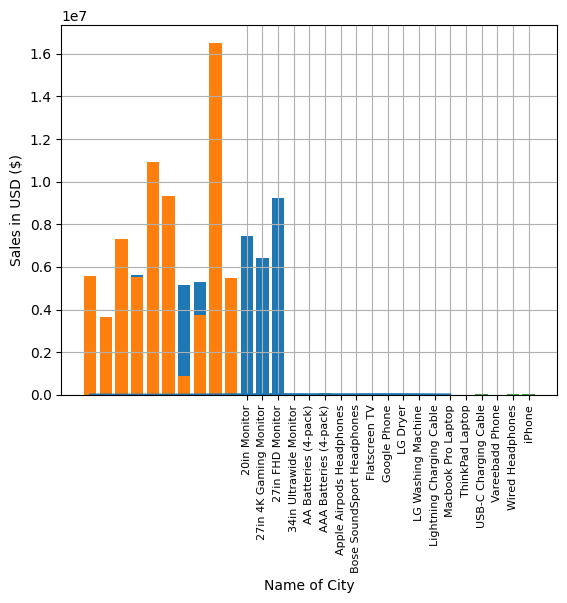

C:\Users\nikhi\AppData\Local\Temp\ipykernel_1948\3006595984.py:160: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = all_data.groupby('Product').mean()['Price Each']
C:\Users\nikhi\AppData\Local\Temp\ipykernel_1948\3006595984.py:175: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=8)
C:\Users\nikhi\AppData\Local\Temp\ipykernel_1948\3006595984.py:177: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


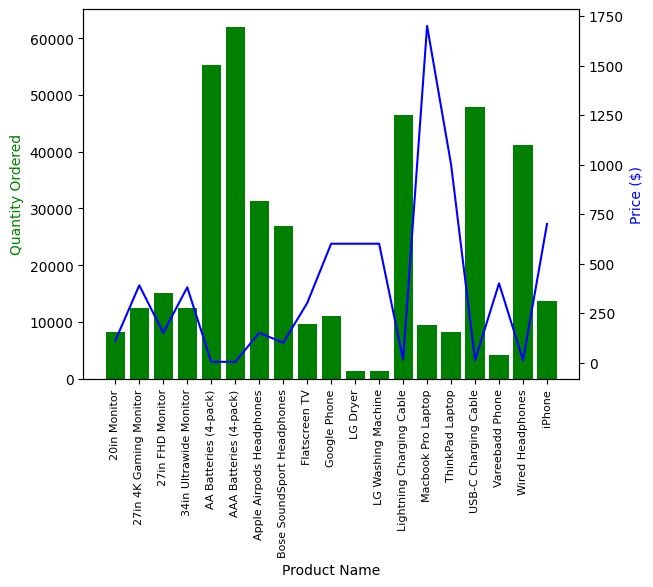

In [8]:
class Sales:
    path = "./Sales_Data"
    def __init__(self):
        
        self.files = [self.file for self.file in os.listdir(self.path) if not self.file.startswith('.')]
        #print(self.files)
        
        # Read all files and save in new file
        
        #self.all_month_data = pd.DataFrame()

        #for self.file in self.files:
            #self.current_data = pd.read_csv(path + "/" + self.file)
            #self.all_month_data = pd.concat([self.all_month_data, self.current_data])

        #self.all_month_data.to_csv(path+'/'+"all_data_copy.csv", index=False)
        
    def read(self):
        all_data = pd.read_csv(self.path+ '/'+"all_data_copy.csv")
        #print(all_data.head(10))
        #all_data.info()
        
        nan_df = all_data[all_data.isna().any(axis=1)]
        #print(nan_df.head(), '\n\n', len(nan_df))
        
        all_data = all_data.dropna(how='all')
        #print(all_data.head())
        
        all_data = all_data.reset_index(drop=True)
        #print(all_data.head())
        
        #all_data.info()
        
        #print(all_data[all_data['Order Date'].str[0:2]=='Or'])
        
        all_data = all_data[all_data['Order Date'].str[0:2]!='Or']
        #print(all_data.head(10))
        
        all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"])

        all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])
        
        #print(all_data.head())
        
        #all_data.info()
        
        all_data['Month'] = pd.to_datetime(all_data['Order Date']).dt.month
        #print(all_data['Month'][0])
        #print(all_data.head())
        
        def get_city(address):
            return address.split(",")[1].strip()

        def get_state(address):
            return address.split(",")[2].split()[0]

        all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
        #print(all_data.head())
        
        all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
        all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
        all_data['Count'] = 1
        #print(all_data.head(10))
        
        
        # Question 1
        
        all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
        print(all_data.head(10))
        
        all_data.groupby(['Month']).sum()['Sales']
        
        months = range(1, 13)

        #print(months)

        plt.bar(months, all_data.groupby(['Month']).sum()['Sales'])

        plt.xticks(months)
        plt.ylabel('Sales in USD ($)')
        plt.xlabel('Month number')
        #plt.show()
        #plt.savefig('Sales chart.png', dpi=300)
        #print(max(all_data.groupby(['Month']).sum()['Sales']))
        
        
        # Question 2
        
        all_data.groupby(['City']).sum()
        keys = [city for city, df in all_data.groupby(['City'])]
        #print(keys)

        plt.bar(keys, all_data.groupby(['City']).sum()['Sales'])

        plt.ylabel('Sales in USD ($)')
        plt.xlabel('Name of City')

        plt.xticks(keys, rotation='vertical', size=8)

        #plt.show()
        
        
        # Question 3
        
        all_data.groupby(['Hour']).count()['Count']
        keys = range(24)  #[pair for pair, df in all_data.groupby(['Hour'])]
        print(keys)

        plt.plot(keys, all_data.groupby(['Hour']).count()['Count']) #Line plot

        plt.xticks(keys)

        plt.grid()

        #plt.show()
        
        # My recommendation is slightly before 9am or after 8pm
        #print(all_data.head(20))
        
        
        # Question 4
        
        df = all_data[all_data['Order ID'].duplicated(keep=False)]

        df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

        df2 = df[['Order ID', 'Grouped']].drop_duplicates()

        #print(df2.head())
        df2.info()
        from itertools import combinations

        from collections import Counter

        count = Counter()

        for row in df2['Grouped']:
            row_list = row.split(',')
            count.update(Counter(combinations(row_list, 2)))

        for key,value in count.most_common(10):#Top 10 pairs
            print(key, value)
            
        
        # Question 5
        
        product_group = all_data.groupby('Product')

        quantity_ordered = product_group.sum()['Quantity Ordered']

        #print(product_group)
        #print(quantity_ordered)

        keys = [pair for pair, df in product_group]

        plt.bar(keys, quantity_ordered)

        plt.xticks(keys, rotation='vertical', size=8)
        plt.show()
        
        prices = all_data.groupby('Product').mean()['Price Each']

        fig, ax1 = plt.subplots()

        ax2 = ax1.twinx()

        ax1.bar(keys, quantity_ordered, color='g')

        ax2.plot(keys, prices, color='b')#line plot

        ax1.set_xlabel('Product Name')
        ax1.set_ylabel('Quantity Ordered', color='g')

        ax2.set_ylabel('Price ($)', color='b')

        ax1.set_xticklabels(keys, rotation='vertical', size=8)

        fig.show()
        

if __name__=="__main__":
    s=Sales()
    s.read()
   